# Чтение данных

Рекомендации по размеру продукта и прогнозирование соответствия имеют решающее значение для улучшения покупательского опыта клиентов и снижения показателей возврата продукта

Этот набор данных содержит информацию о ~192 тысяч покупок, совершенных ~105 тысячами покупателей. А также информацию о размерах этих покупателей и результат - подошла ли купленная одежда по размеру или нет.

- user_id - уникальный идентификатор покупателя
- age - возраст покупателя
- body type - тип фигуры
- weight - вес
- bust size - размер груди
- height - рост
- item_id - артикул продукта
- id size - размер продукта
- category - вид продукта (например, платье, жакет и т.д)
- rating - рейтинг продукта
- rented for - для какого случая была куплена одежда
- review_date - дата отзыва
- review_summary - краткий отзыв покупателя о товаре
- review_text - подробный отзыв покупателя о товаре
- fit - подошло или нет (подошло, мало, велико)

Необходимо определить, подойдет ли купленная одежда покупателю

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
data = pd.read_json('renttherunway_final_data.json', lines=True)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
print('Data RentTheRunWay shape: ', data.shape)

Data RentTheRunWay shape:  (192544, 15)


In [5]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
data.tail()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"
192543,fit,123612,36b,127865,155lbs,10.0,wedding,This dress was wonderful! I had originally pla...,athletic,I wore this to a beautiful black tie optional ...,gown,"5' 6""",16,30.0,"August 29, 2017"


In [7]:
print(data.shape)
print(data.columns)

(192544, 15)
Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')


##  Обработка данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


Переведем столбцы weight и height в привычную систему мер и весов

In [9]:
def lbs_to_kgs(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[:-3]) * 0.454)
    except:
        return x
    
data.weight = data.weight.apply(lbs_to_kgs)

In [10]:
def fts_to_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0]) * 30.48 + int(x[3:-1]) * 2.54)
    except:
        return (int(x[0]) * 30.48)
    
data.height = data.height.apply(fts_to_cms)

In [11]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,62.198,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,59.928,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,162.56,4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,61.290,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,65.830,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016"


#### Диапазон индексов строк

In [12]:
data.index

RangeIndex(start=0, stop=192544, step=1)

In [13]:
data['size']

0         14
1         12
2          4
3          8
4         12
          ..
192539     8
192540     4
192541     8
192542    16
192543    16
Name: size, Length: 192544, dtype: int64

In [14]:
data.at[30, 'weight']

55.842

In [15]:
data['category'].dtype.name

'object'

In [16]:
data['age'].dtype.name

'float64'

In [17]:
data[['age', 'height']].head()

,age,height
0,28.0,172.72
1,36.0,167.64
2,116.0,162.56
3,34.0,165.10
4,27.0,175.26


Отобразим основные характеристики каждого из параметров для ненормированных данных и матрицу ковариаций

In [18]:
data.describe()

,user_id,item_id,weight,rating,height,size,age
count,192544.000000,1.925440e+05,162562.000000,192462.000000,191867.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,62.375836,9.092371,165.888978,12.245175,33.871017
std,289059.719328,8.053148e+05,9.942585,1.430044,6.765239,8.494877,8.058083
min,9.000000,1.233730e+05,22.700000,2.000000,137.160000,0.000000,0.000000
25%,250654.250000,1.950760e+05,55.842000,8.000000,160.020000,8.000000,29.000000
50%,499419.000000,9.483960e+05,61.290000,10.000000,165.100000,12.000000,32.000000
75%,750974.000000,1.678888e+06,67.192000,10.000000,170.180000,16.000000,37.000000
max,999997.000000,2.966087e+06,136.200000,10.000000,198.120000,58.000000,117.000000


In [19]:
data.describe(include = [object])

,fit,bust size,rented for,review_text,body type,review_summary,category,review_date
count,192544,174133,192534,192544,177907,192544,192544,192544
unique,3,106,9,191031,7,154740,68,2274
top,fit,34b,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016"
freq,142058,27285,57784,63,55349,977,92884,844


Столбец bust size содержит много уникальных значений

In [20]:
data['bust size'].unique()

array(['34d', '34b', nan, '34c', '32b', '34d+', '36d', '36a', '32d+',
       '36c', '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd',
       '40ddd/e', '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d',
       '36ddd/e', '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f',
       '30ddd/e', '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c',
       '30d', '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa',
       '34g', '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a',
       '44ddd/e', '30c', '30aa', '44dd', '32i', '32g', '30g', '38h',
       '30h', '34j', '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h',
       '36j', '40f', '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i',
       '28h', '42b', '42j', '32j', '46c', '48d', '38aa', '38i', '48dd',
       '28d', '28i', '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f',
       '44b', '44g', '42h', '40i', '44h'], dtype=object)

Данные можно разделить на два столбца: bra_size (число) и cup_size (буквы)

In [21]:
data['bra_size'] = pd.to_numeric(data['bust size'].str[:2])
data['cup_size'] = data['bust size'].str[2:]
data = data.drop('bust size', axis=1)

In [22]:
data.head()

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,bra_size,cup_size
0,fit,420272,2260466,62.198,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016",34.0,d
1,fit,273551,153475,59.928,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013",34.0,b
2,fit,360448,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,162.56,4,116.0,"December 14, 2015",NaN,NaN
3,fit,909926,126335,61.290,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014",34.0,c
4,fit,151944,616682,65.830,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016",34.0,b


In [23]:
data.describe(include = [object])

,fit,rented for,review_text,body type,review_summary,category,review_date,cup_size
count,192544,192534,192544,177907,192544,192544,192544,174133
unique,3,9,191031,7,154740,68,2274,13
top,fit,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016",c
freq,142058,57784,63,55349,977,92884,844,49634


In [24]:
data['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

Столбец category тоже содержит много уникальных значений, но единственное, что можно сделать - удалить его

In [25]:
data['weight'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     45.400
0.010     45.400
0.050     49.940
0.100     52.210
0.500     61.290
0.900     74.910
0.950     81.266
0.990     96.248
0.995    104.420
Name: weight, dtype: float64

Значения веса человека находятся в ожидаемых пределах. Нет слишком больших или слишком малых значений

In [26]:
data['height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    149.86
0.010    152.40
0.050    154.94
0.100    157.48
0.500    165.10
0.900    175.26
0.950    177.80
0.990    182.88
0.995    182.88
Name: height, dtype: float64

Аналогичная ситуация с ростом человека. 

In [27]:
data.corr()
#sns.heatmap(corr_mat, square=True, cmap='coolwarm')


,user_id,item_id,weight,rating,height,size,age,bra_size
user_id,1.000000,-0.002721,0.000473,-0.006973,-0.009237,0.003442,0.007424,0.005144
item_id,-0.002721,1.000000,-0.035320,-0.001163,0.004690,-0.044311,0.026516,-0.051760
weight,0.000473,-0.035320,1.000000,-0.022494,0.383784,0.850962,0.066194,0.642023
rating,-0.006973,-0.001163,-0.022494,1.000000,0.001746,-0.036731,-0.035280,-0.019586
height,-0.009237,0.004690,0.383784,0.001746,1.000000,0.228875,-0.007465,0.156607
size,0.003442,-0.044311,0.850962,-0.036731,0.228875,1.000000,0.155687,0.660161
age,0.007424,0.026516,0.066194,-0.035280,-0.007465,0.155687,1.000000,0.171436
bra_size,0.005144,-0.051760,0.642023,-0.019586,0.156607,0.660161,0.171436,1.000000


Матрица корреляции

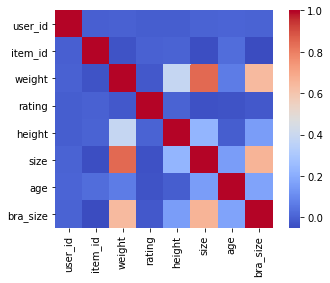

In [28]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')

In [29]:
data.corr() > 0.5

,user_id,item_id,weight,rating,height,size,age,bra_size
user_id,True,False,False,False,False,False,False,False
item_id,False,True,False,False,False,False,False,False
weight,False,False,True,False,False,True,False,True
rating,False,False,False,True,False,False,False,False
height,False,False,False,False,True,False,False,False
size,False,False,True,False,False,True,False,True
age,False,False,False,False,False,False,True,False
bra_size,False,False,True,False,False,True,False,True


Достаточно большие значения коэффициента корреляции между признаками weight, size, bra size достаточно объяснимы. 

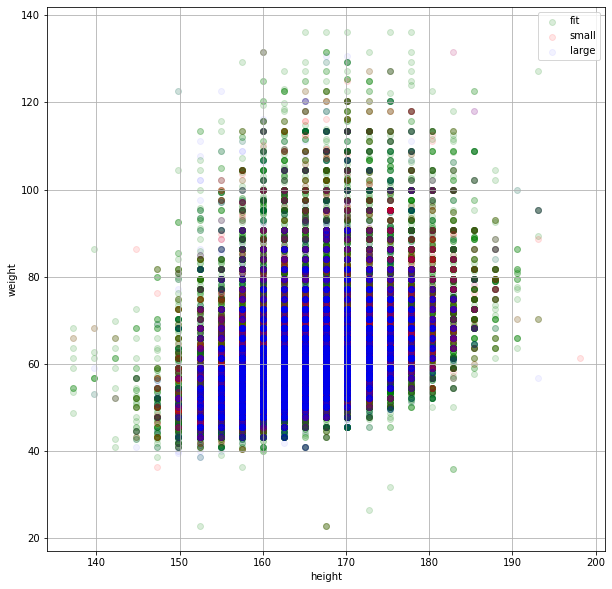

In [30]:
plt.figure(figsize = (10, 10))

plt.scatter(data[data['fit'] == 'fit']['height'],
            data[data['fit'] == 'fit']['weight'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(data[data['fit'] == 'small']['height'],
            data[data['fit'] == 'small']['weight'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(data[data['fit'] == 'large']['height'],
            data[data['fit'] == 'large']['weight'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.grid()

Как видно из диаграммы, рост и вес человека не так сильно зависят друг от друга, как можно было бы предположить изначально. Значения корреляции между этими двумя признаками также небольшое, что говорит нам о том, что нет прямой зависимости между ростом и весом.

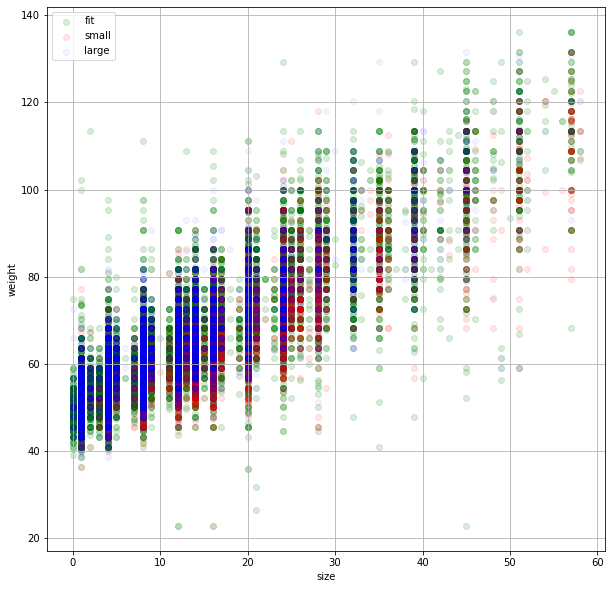

In [31]:
plt.figure(figsize = (10, 10))

plt.scatter(data[data['fit'] == 'fit']['size'],
            data[data['fit'] == 'fit']['weight'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(data[data['fit'] == 'small']['size'],
            data[data['fit'] == 'small']['weight'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(data[data['fit'] == 'large']['size'],
            data[data['fit'] == 'large']['weight'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('size')
plt.ylabel('weight')
plt.legend()
plt.grid()

Из даграммы видно, что размер одежды зависит от веса человека. Чем больше вес, тем больше размер.

##### Зависимость между размером и размером груди

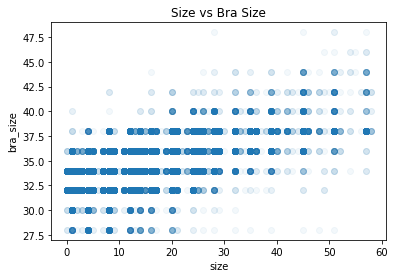

In [32]:
plt.plot(data['size'], data['bra_size'], 'o', alpha = 0.05)
plt.xlabel('size')
plt.ylabel('bra_size')
plt.title('Size vs Bra Size')
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных

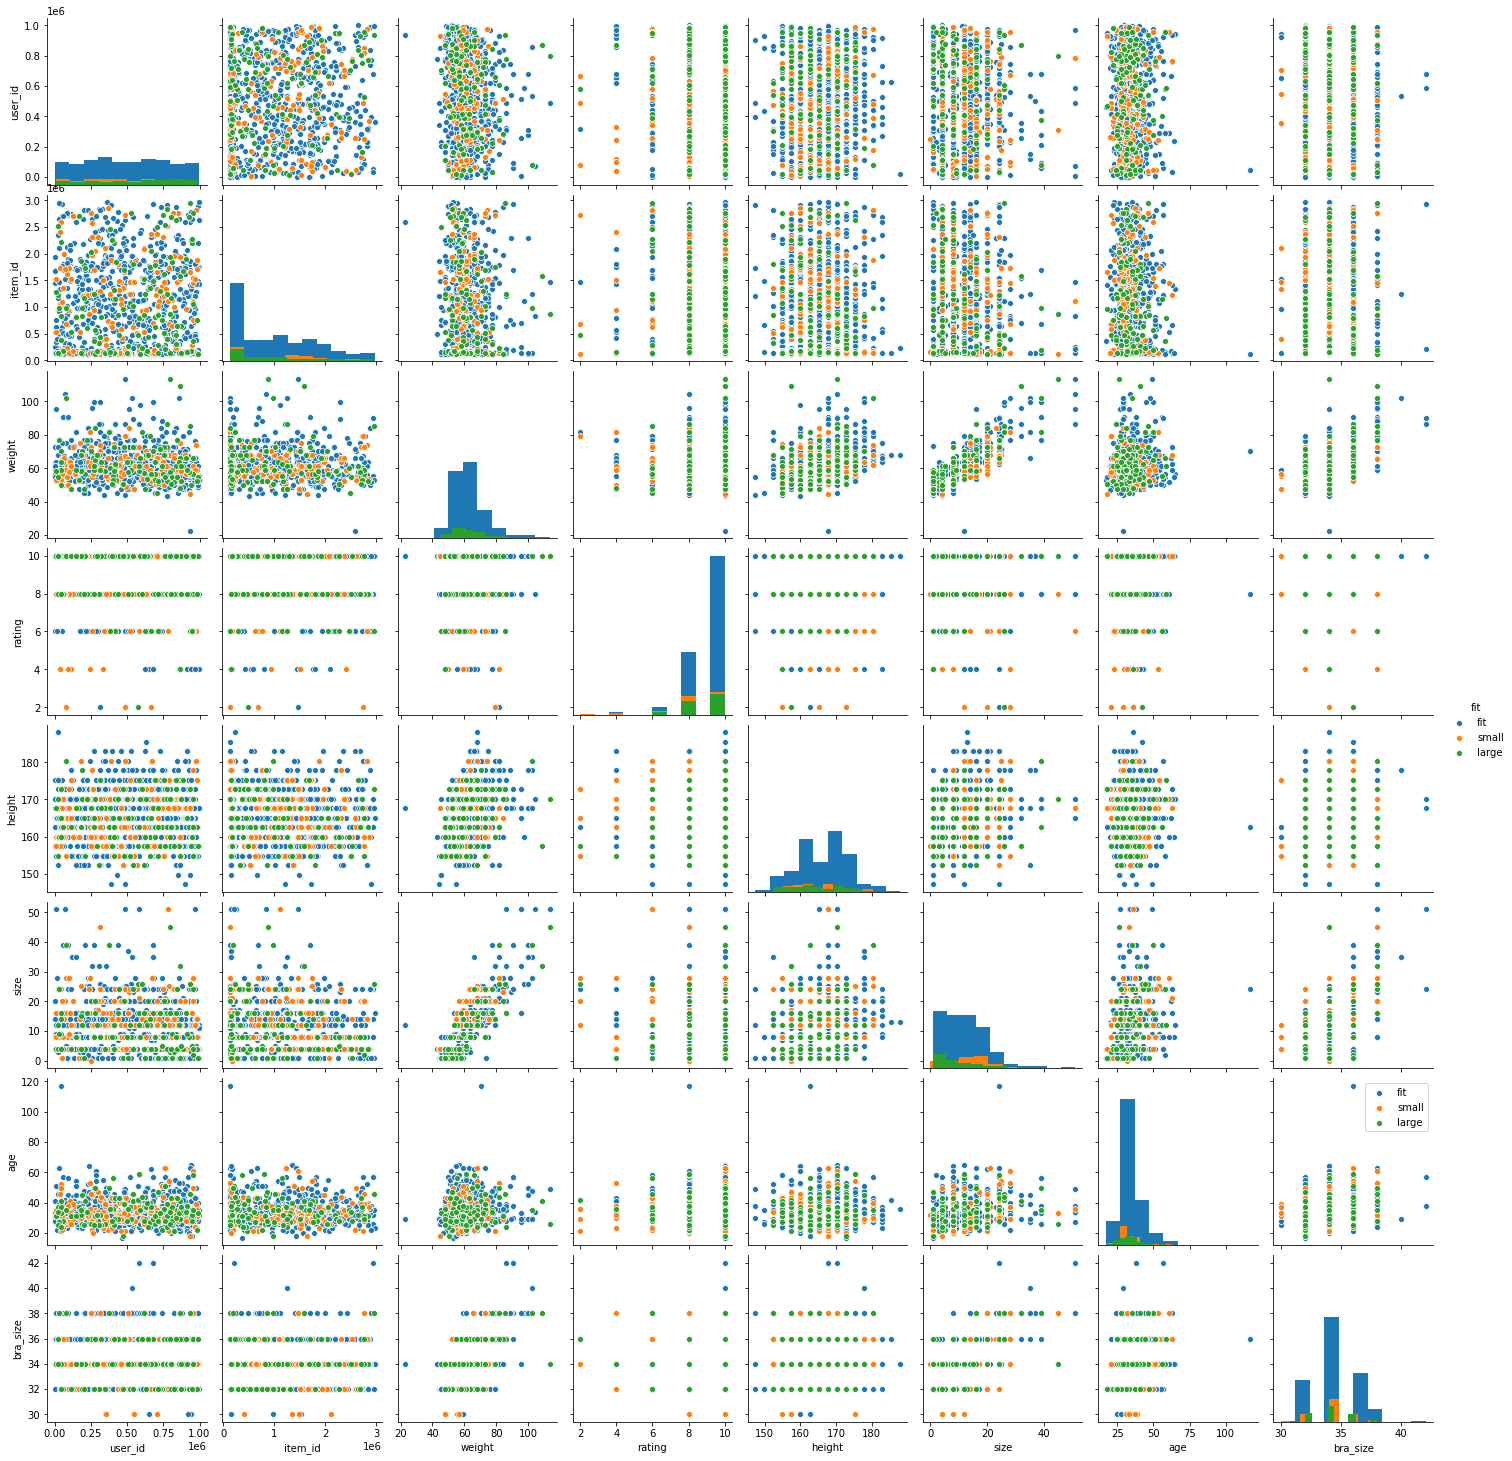

In [33]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='fit', diag_kind='hist')
plt.legend()
pass

На диаграммах, в частности, наблюдается попарная корреляция между size, weigh и bra size.

На диагонали расположены гистограммы распределения признаков.

# Обработка пропущенных значений

In [34]:
missing = pd.DataFrame({'missing': data.isnull().sum(), '%': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,%
fit,0,0.00
user_id,0,0.00
item_id,0,0.00
weight,29982,15.57
rating,82,0.04
rented for,10,0.01
review_text,0,0.00
body type,14637,7.60
review_summary,0,0.00
category,0,0.00


In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['fit', 'rented for', 'review_text', 'body type', 'review_summary', 'category', 'review_date', 'cup_size']
['user_id', 'item_id', 'weight', 'rating', 'height', 'size', 'age', 'bra_size']


In [36]:
data.median(axis = 0)

user_id     499419.00
item_id     948396.00
weight          61.29
rating          10.00
height         165.10
size            12.00
age             32.00
bra_size        34.00
dtype: float64

In [37]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [38]:
data_describe = data.describe(include = [object])
data_describe

,fit,rented for,review_text,body type,review_summary,category,review_date,cup_size
count,192544,192534,192544,177907,192544,192544,192544,174133
unique,3,9,191031,7,154740,68,2274,13
top,fit,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016",c
freq,142058,57784,63,55349,977,92884,844,49634


In [39]:
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [40]:
missing = pd.DataFrame({'missing': data.isnull().sum(), '%': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,%
fit,0,0.0
user_id,0,0.0
item_id,0,0.0
weight,0,0.0
rating,0,0.0
rented for,0,0.0
review_text,0,0.0
body type,0,0.0
review_summary,0,0.0
category,0,0.0


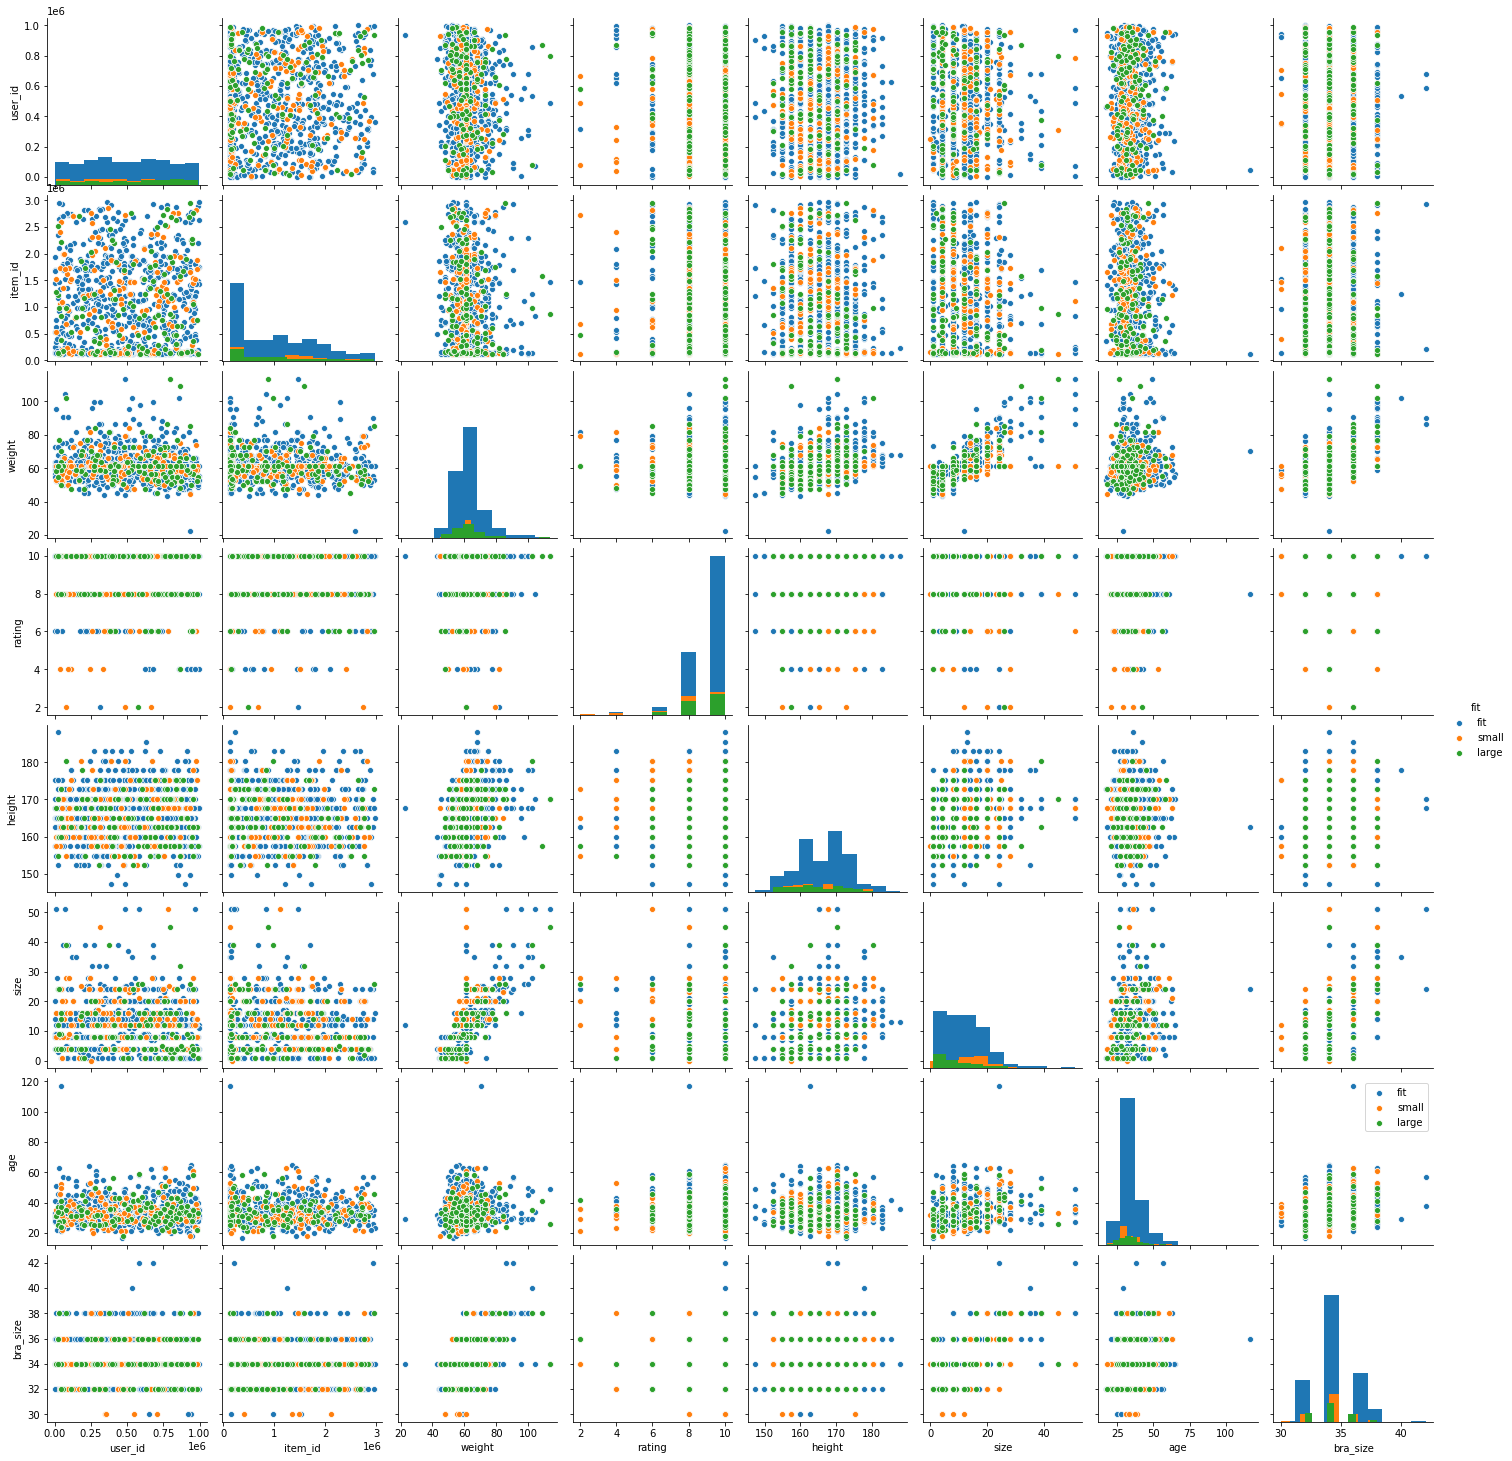

In [41]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='fit', diag_kind='hist')
plt.legend()
pass

# Анализ задачи

Столбцы user_id, item_id, 'review_date', 'review_summary', 'review_text' не являются значимыми для подбора подходящей одежды.

In [42]:
data = data.drop(['user_id', 'item_id', 'review_date', 'review_summary', 'review_text', 'category'], axis=1)

In [43]:
data.head()

,fit,weight,rating,rented for,body type,height,size,age,bra_size,cup_size
0,fit,62.198,10.0,vacation,hourglass,172.72,14,28.0,34.0,d
1,fit,59.928,10.0,other,straight & narrow,167.64,12,36.0,34.0,b
2,fit,61.290,10.0,party,hourglass,162.56,4,116.0,34.0,c
3,fit,61.290,8.0,formal affair,pear,165.10,8,34.0,34.0,c
4,fit,65.830,10.0,wedding,athletic,175.26,12,27.0,34.0,b


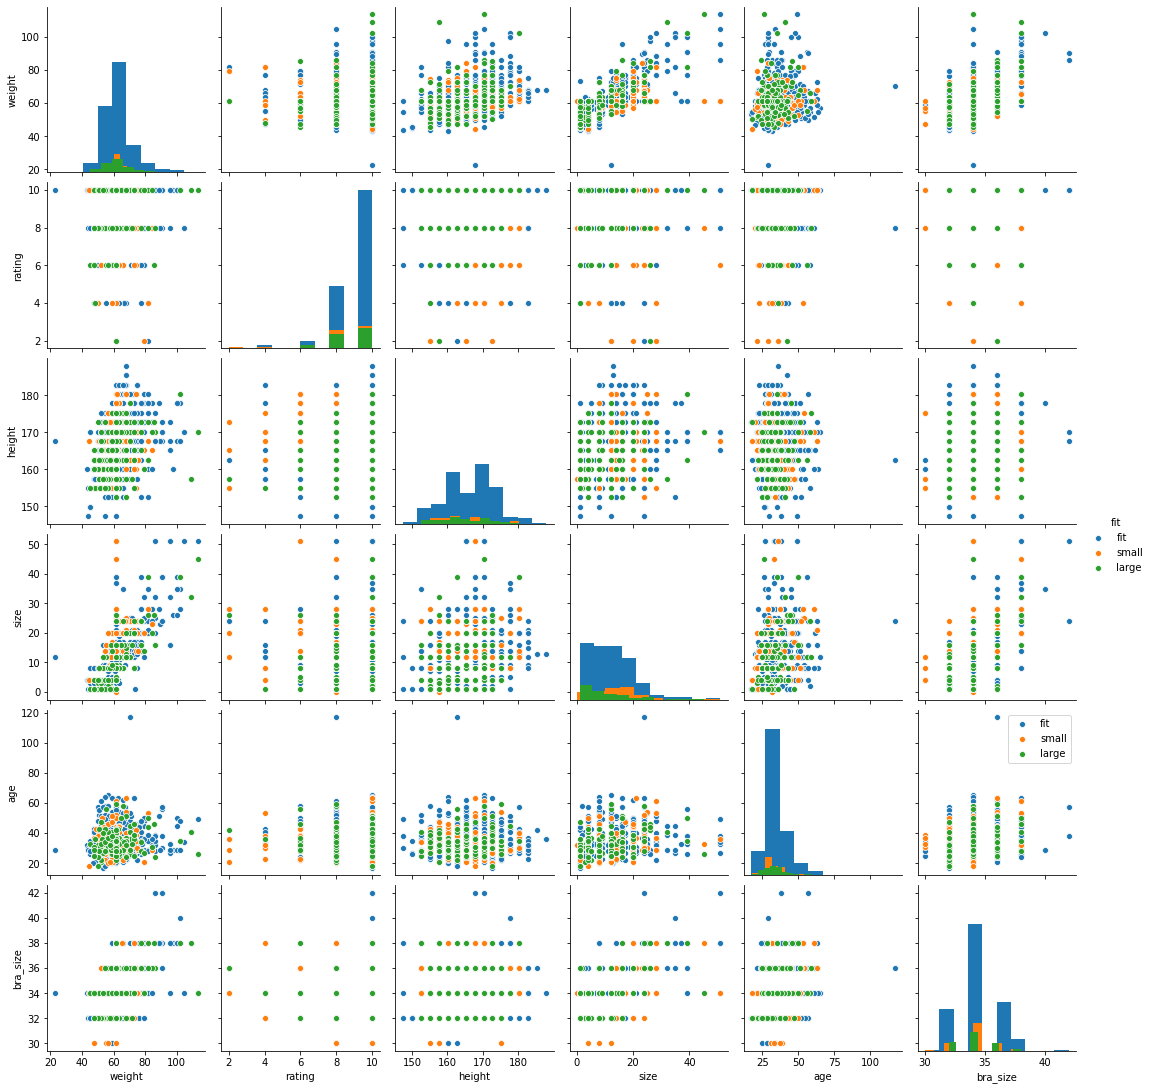

In [44]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='fit', diag_kind='hist')
plt.legend()
pass

# Векторизация данных

In [45]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
categorical_columns.remove('fit')
print(categorical_columns)

['rented for', 'body type', 'cup_size']


In [46]:
data_categorical = pd.get_dummies(data[categorical_columns])
print(data_categorical.columns)

Index(['rented for_date', 'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party', 'rented for_party: cocktail',
       'rented for_vacation', 'rented for_wedding', 'rented for_work',
       'body type_apple', 'body type_athletic', 'body type_full bust',
       'body type_hourglass', 'body type_pear', 'body type_petite',
       'body type_straight & narrow', 'cup_size_a', 'cup_size_aa',
       'cup_size_b', 'cup_size_c', 'cup_size_d', 'cup_size_d+', 'cup_size_dd',
       'cup_size_ddd/e', 'cup_size_f', 'cup_size_g', 'cup_size_h',
       'cup_size_i', 'cup_size_j'],
      dtype='object')


# Нормализация данных

In [47]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,weight,rating,height,size,age,bra_size
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,62.206755,9.092758,165.886204,12.245175,33.861689,34.182026
std,9.144217,1.429862,6.753497,8.494877,8.039050,1.660765
min,22.700000,2.000000,137.160000,0.000000,0.000000,28.000000
25%,56.750000,8.000000,160.020000,8.000000,29.000000,34.000000
50%,61.290000,10.000000,165.100000,12.000000,32.000000,34.000000
75%,65.830000,10.000000,170.180000,16.000000,37.000000,36.000000
max,136.200000,10.000000,198.120000,58.000000,117.000000,48.000000


In [48]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,weight,rating,height,size,age,bra_size
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05
mean,6.519460e-12,1.788176e-15,-5.159876e-12,-2.038348e-16,-5.217660e-16,7.557040e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.320409e+00,-4.960448e+00,-4.253530e+00,-1.441478e+00,-4.212151e+00,-3.722398e+00
25%,-5.967438e-01,-7.642401e-01,-8.686173e-01,-4.997336e-01,-6.047591e-01,-1.096037e-01
50%,-1.002552e-01,6.344961e-01,-1.164144e-01,-2.886153e-02,-2.315807e-01,-1.096037e-01
75%,3.962335e-01,6.344961e-01,6.357885e-01,4.420105e-01,3.903834e-01,1.094661e+00
max,8.091807e+00,6.344961e-01,4.772905e+00,5.386167e+00,1.034181e+01,8.320249e+00


# Соединяем данные в одну таблицу

In [49]:
data = pd.concat((data_numerical, data_categorical, data['fit']), axis = 1)
print(data.shape)

(192544, 36)


In [50]:
data.describe()

,weight,rating,height,size,age,bra_size,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,...,cup_size_c,cup_size_d,cup_size_d+,cup_size_dd,cup_size_ddd/e,cup_size_f,cup_size_g,cup_size_h,cup_size_i,cup_size_j
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,...,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,6.519460e-12,1.788176e-15,-5.159876e-12,-2.038348e-16,-5.217660e-16,7.557040e-16,0.038370,0.087367,0.209864,0.079919,...,0.353400,0.233754,0.020546,0.034813,0.013514,0.002379,0.002285,0.000810,0.000208,0.000156
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.192089,0.282373,0.407212,0.271169,...,0.478027,0.423219,0.141859,0.183306,0.115461,0.048714,0.047749,0.028453,0.014412,0.012481
min,-4.320409e+00,-4.960448e+00,-4.253530e+00,-1.441478e+00,-4.212151e+00,-3.722398e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.967438e-01,-7.642401e-01,-8.686173e-01,-4.997336e-01,-6.047591e-01,-1.096037e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.002552e-01,6.344961e-01,-1.164144e-01,-2.886153e-02,-2.315807e-01,-1.096037e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.962335e-01,6.344961e-01,6.357885e-01,4.420105e-01,3.903834e-01,1.094661e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.091807e+00,6.344961e-01,4.772905e+00,5.386167e+00,1.034181e+01,8.320249e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и Y

In [51]:
X = data.drop(('fit'), axis = 1)
y = data['fit']

In [52]:
print(X.shape)
print(y.shape)

(192544, 35)
(192544,)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

134780 57764


# kNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_train_predict = knn.predict(X_train)

In [56]:
y_test_predict = knn.predict(X_test)

In [57]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.24779640896275412 0.26923343258777094


Найдем оптимальное значение n_neighbors

In [58]:
%%time
from sklearn.model_selection import GridSearchCV
nnb = [1, 10, 25, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)


0.25932630954147506 50
Wall time: 22min 26s


Наилучшее значение количества ближайших соседей = 50

In [59]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2576717613889301 0.26334741361401565


## Extremely Randomized Trees

In [60]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

NameError: name 'ensemble' is not defined

## PCA

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[ 0.30087916, -1.27523021],
       [-0.1991868 , -0.24919556],
       [ 0.69365621,  7.12317115],
       ...,
       [ 0.44294012,  0.40856877],
       [ 1.59306018, -0.71478765],
       [ 1.21588342, -0.79497327]])

In [63]:
pca_X = pd.DataFrame(data=principal_components,
                     columns = ['principal_component_1', 'principal_component_2'])
pca_X.head()

,principal_component_1,principal_component_2
0,0.300879,-1.275230
1,-0.199187,-0.249196
2,0.693656,7.123171
3,-0.374389,0.393348
4,0.331954,-1.729893


In [64]:
final_data = pd.concat([pca_X, y], axis=1)
final_data.head()

,principal_component_1,principal_component_2,fit
0,0.300879,-1.275230,fit
1,-0.199187,-0.249196,fit
2,0.693656,7.123171,fit
3,-0.374389,0.393348,fit
4,0.331954,-1.729893,fit


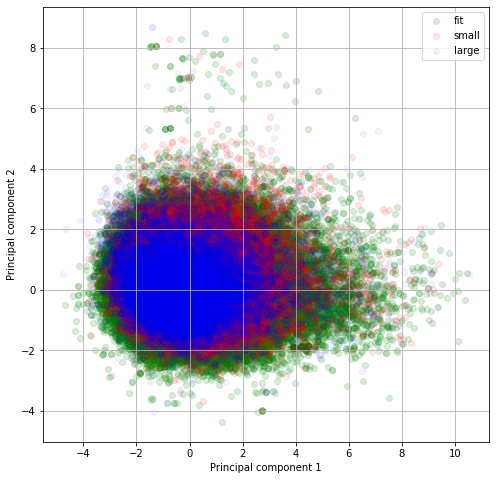

In [65]:
plt.figure(figsize = (8, 8))

plt.scatter(final_data[final_data['fit'] == 'fit']['principal_component_1'],
            final_data[final_data['fit'] == 'fit']['principal_component_2'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(final_data[final_data['fit'] == 'small']['principal_component_1'],
            final_data[final_data['fit'] == 'small']['principal_component_2'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(final_data[final_data['fit'] == 'large']['principal_component_1'],
            final_data[final_data['fit'] == 'large']['principal_component_2'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid()


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

134780 57764


Возьмем вычисленное ранее best_n_neighbors и применим kNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2604540733046446 0.2647150474343882


In [68]:
err_pca_train = []
err_pca_test = []

In [88]:
%%time
errors = []
for n in range(1, 10):
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    
    err_pca_train.append(err_train)
    err_pca_test.append(err_test)
    errors.append([err_train, err_test])

print(errors)

[[0.26094376020181037, 0.2651305311266533], [0.2604540733046446, 0.2647150474343882], [0.2574046594450215, 0.2635551554601482], [0.25704852351981006, 0.26421300463956787], [0.2569891675322748, 0.2639879509729243], [0.2570856210120196, 0.26358977910117026], [0.25737498145125387, 0.26345128453708194], [0.25718949399020624, 0.26296655356277265], [0.2570930405104615, 0.2632608545114604]]
Wall time: 3min 33s


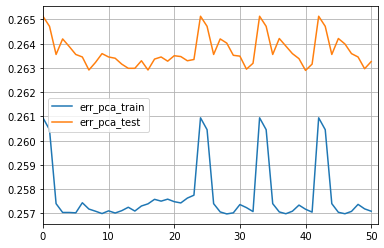

In [116]:
plt.plot(err_pca_train, label='err_pca_train')
plt.plot(err_pca_test, label='err_pca_test')
plt.legend()
plt.grid()
plt.xlim(0, 51)
plt.show()


In [115]:
print(err_pca_test.index(min(err_pca_test)), min(err_pca_test))
print(len(err_pca_test))

40 0.2628973062807285
51


Наибольшая точность для best_n_neighbors = 50 достигается при 40 главных компонентах. Ошибка на тестовых данных на 0.0005 меньше, чем при использовании метода kNN на исходных данных